In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
a = list(range(10))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
b = np.arange(100)
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
c = b.reshape(10, -1)
c

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [5]:
c[:5, :5] + [1, 2, 3, 4, 5]

array([[ 1,  3,  5,  7,  9],
       [11, 13, 15, 17, 19],
       [21, 23, 25, 27, 29],
       [31, 33, 35, 37, 39],
       [41, 43, 45, 47, 49]])

# Gradient descent $f(x, y) = \alpha (x - 5)^2 + (y - 7)^2$


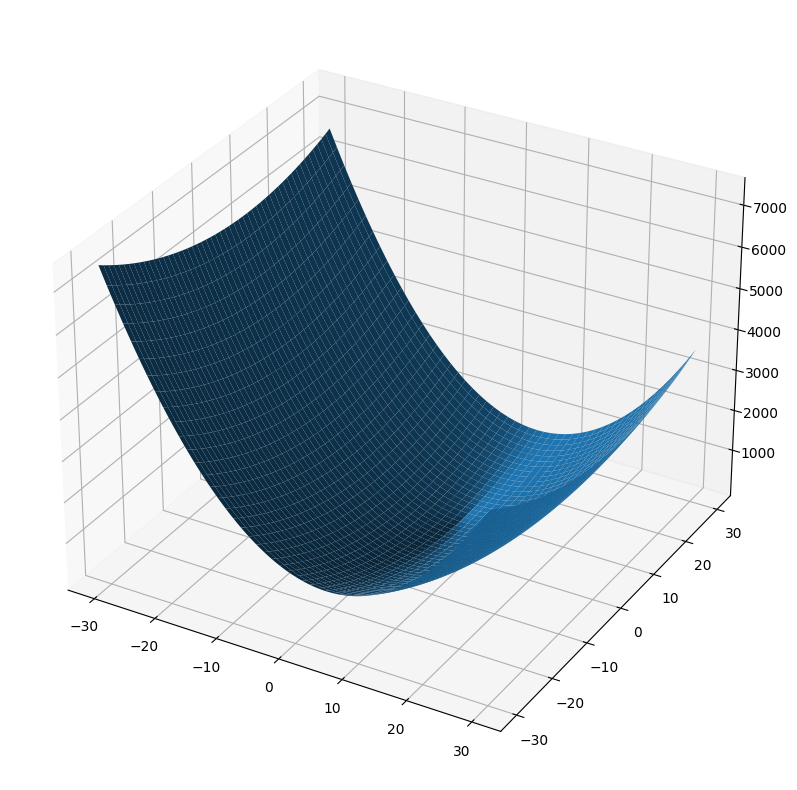

In [6]:
alpha = 5
def f(x, y):
    return alpha * (x - 5) ** 2 + (y - 7) ** 2

def grad(x, y):
    return [2 * alpha * (x  - 5), 2 * (y - 7)]

t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[-20.         -20.        ]
 [  2.5        -15.14      ]
 [  4.75       -11.1548    ]
 [  4.975       -7.886936  ]
 [  4.9975      -5.20728752]
 [  4.99975     -3.00997577]
 [  4.999975    -1.20818013]
 [  4.9999975    0.26929229]
 [  4.99999975   1.48081968]
 [  4.99999997   2.47427214]
 [  5.           3.28890315]
 [  5.           3.95690059]
 [  5.           4.50465848]
 [  5.           4.95381995]
 [  5.           5.32213236]
 [  5.           5.62414854]
 [  5.           5.8718018 ]
 [  5.           6.07487748]
 [  5.           6.24139953]
 [  5.           6.37794762]]


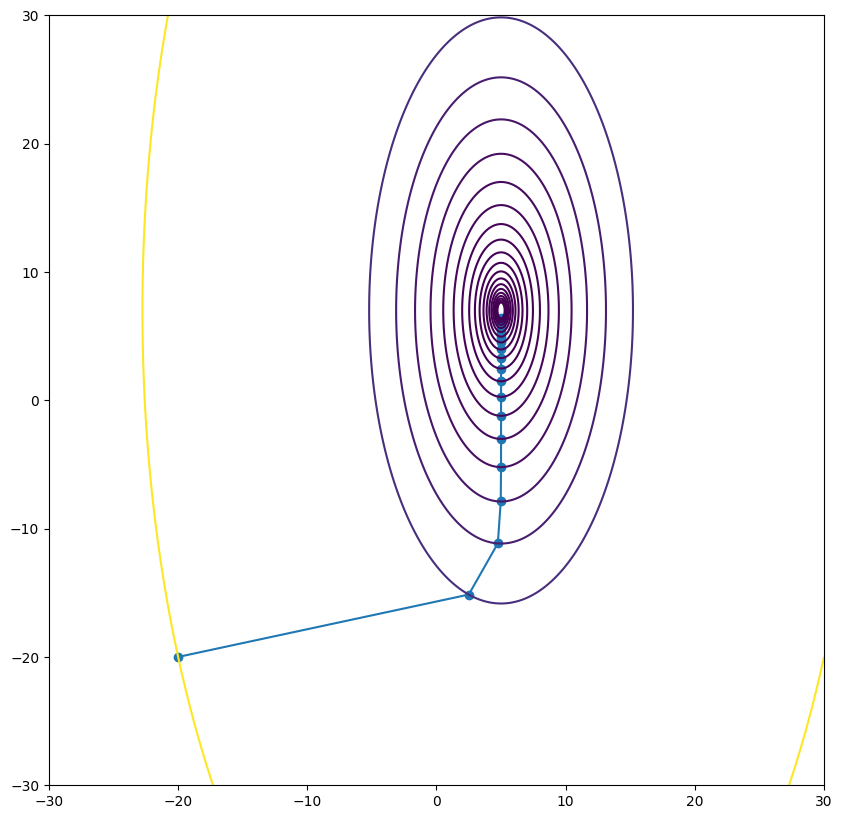

In [7]:
lr = 0.09
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

# Gradient descent $f(x, y) = \sin(0.5 x^2 - 0.25 y^2 + 3)cos(2x+1-\exp(y))$


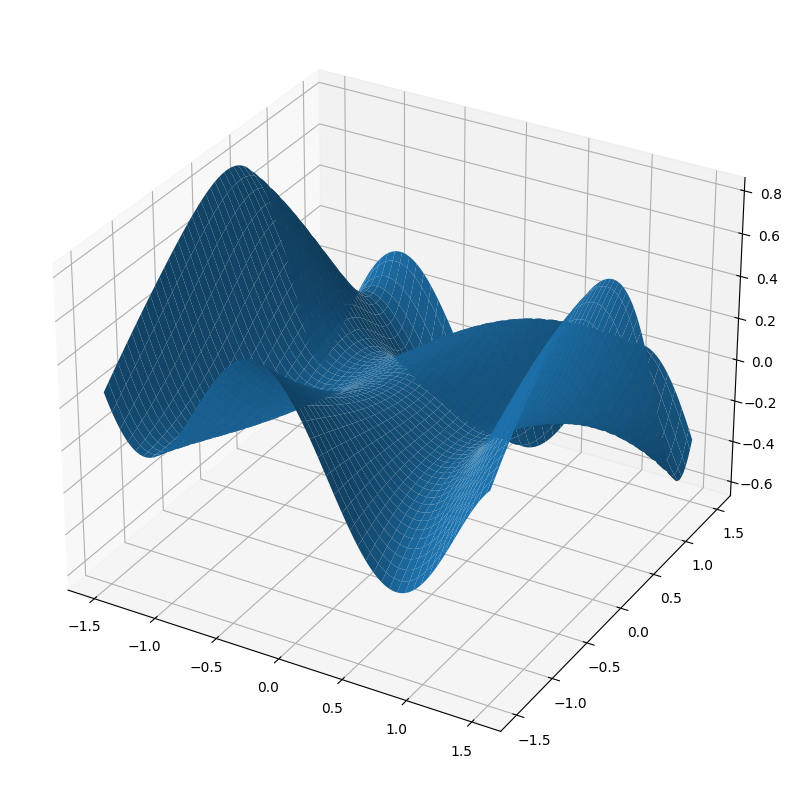

In [8]:
def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

def grad(x):
    h = 1e-5
    return (f(x[:, np.newaxis] + h * np.eye(2)) - f(x[:, np.newaxis] - h * np.eye(2)))/(2*h)

t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(np.stack((X, Y))))

[-0.75047326 -0.29294052] -0.03763185463978794


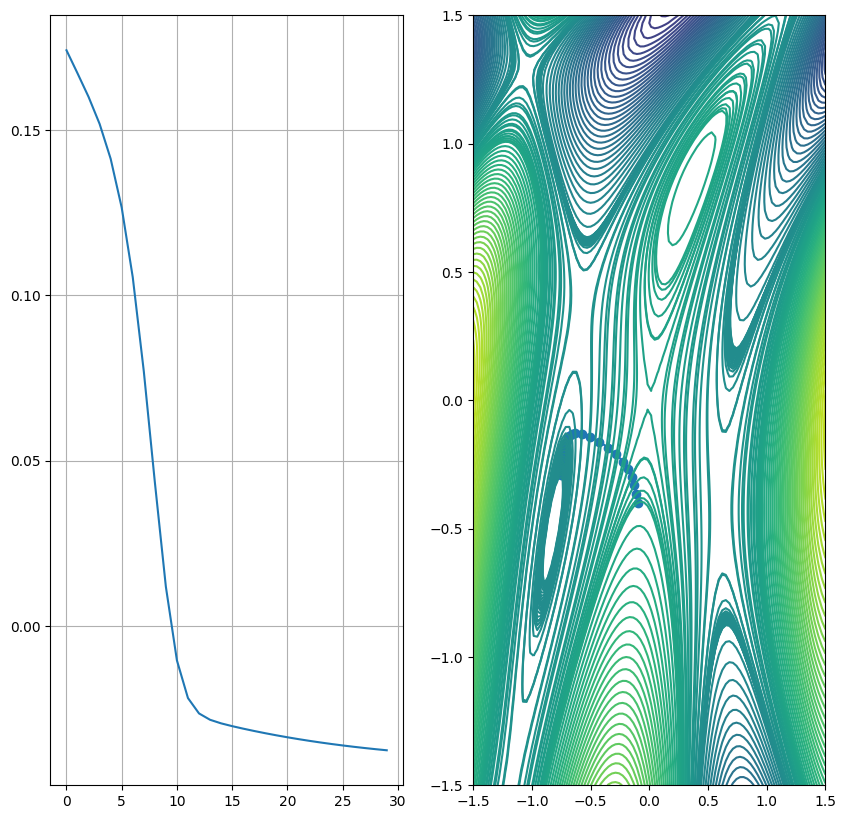

In [9]:
lr = 0.2
epoch = 30
x = np.array([-0.1, -0.4])

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * grad(x)
    points[i] = x

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points.T))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, f(np.stack((X, Y))), levels=np.sort(np.concatenate((f(points.T), np.linspace(-1, 1, 100)))))
print(points[-1], f(points[-1]))

# Gradient descent for Rosenbrock function $f(x,y) = 100(y - x^2)^2 + (1 - x)^2$

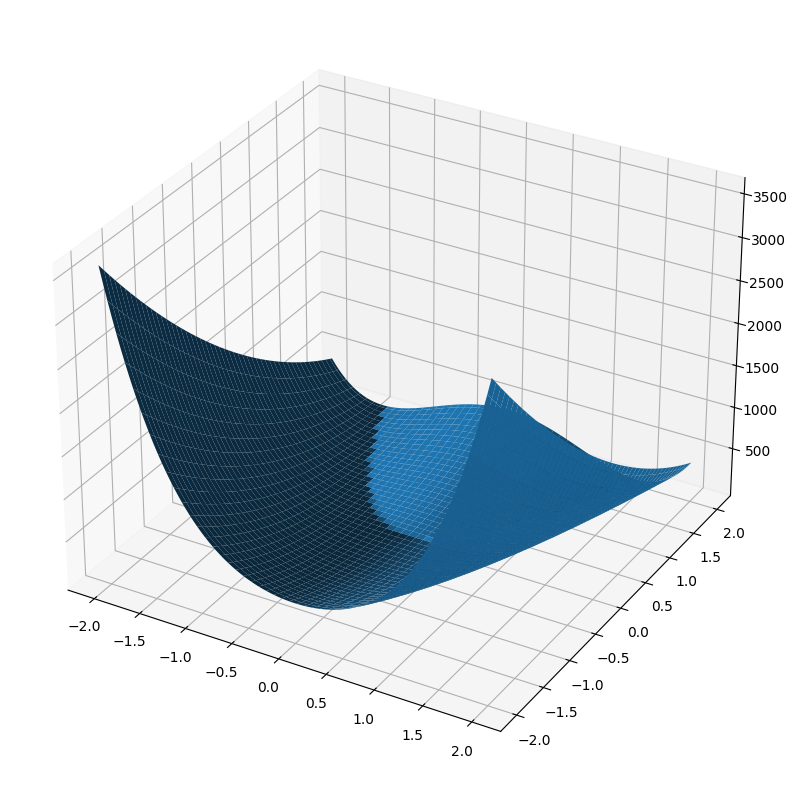

In [10]:
from scipy.optimize import rosen, rosen_der

x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, rosen(np.stack((X, Y))))
plt.show()

[0.40185647 0.15855569] 0.05412981002331557


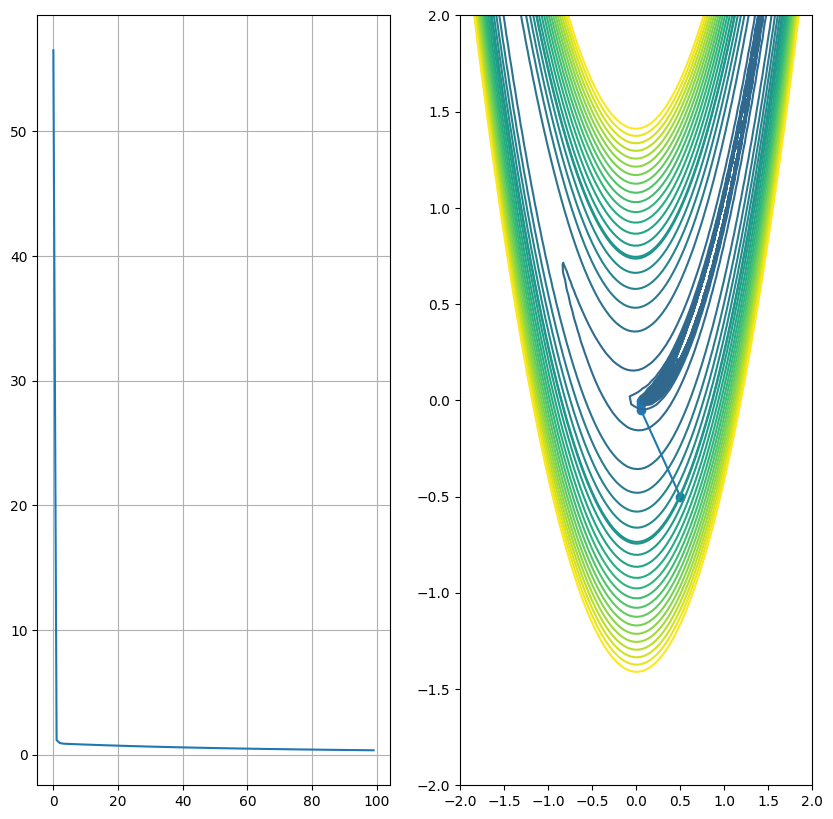

In [11]:
lr = 0.003
epoch = 100
x = np.array([0.5, -0.5])

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * rosen_der(x)
    points[i] = x

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(rosen(points.T))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, rosen(np.stack((X, Y))), levels=np.sort(np.concatenate((rosen(points.T), np.linspace(-100, 200, 30)))))
print(points[-1], f(points[-1]))